In [3]:
import torch

# 加载采样数据
# samples = torch.load("./sample_dir/sample_MNIST_ERAN_patch_size_5_10.pt")
samples = torch.load('./sample_dir/sample_MNIST_ERAN_l_inf.pt')
# 查看 shape
print("Shape of samples:", samples.shape)  # 预期 (sample_num, 1, 28, 28) 或 (sample_num, 28*28)


Shape of samples: torch.Size([10, 1, 28, 28])


In [5]:
import torch

# 加载采样数据
# samples = torch.load("./sample_dir/sample_MNIST_ERAN_patch_size_5_10.pt")
samples = torch.load('./sample_dir/base_sample_MNIST_ERAN_patch_size_4_4.pt')
# 查看 shape
print("Shape of samples:", samples.shape)  # 预期 (sample_num, 1, 28, 28) 或 (sample_num, 28*28)


Shape of samples: torch.Size([10, 1, 28, 28])


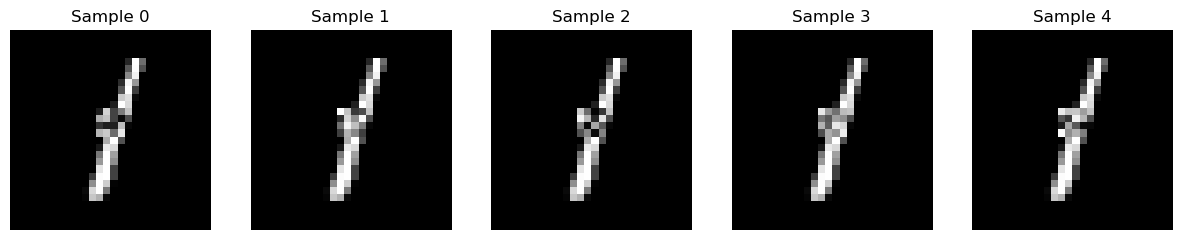

In [6]:
import matplotlib.pyplot as plt

# 如果数据是 (1000, 784)，需要 reshape 成 (1000, 28, 28)
if samples.ndimension() == 2 and samples.shape[1] == 28 * 28:
    samples = samples.view(samples.shape[0], 28, 28)
elif samples.ndimension() == 4:  # 如果是 (1000, 1, 28, 28)，去掉通道维度
    samples = samples.squeeze(1)
# 选取索引范围
start_idx =0
end_idx =4 # 这里的索引是 "包含100" 的，因此样本总数是 `100 - 95 + 1 = 6`

# 创建 `end_idx - start_idx + 1` 个子图
num_samples_to_plot = end_idx - start_idx + 1
fig, axes = plt.subplots(1, num_samples_to_plot, figsize=(15, 3))

# 遍历 `95` 到 `100` 之间的索引
for i, sample_idx in enumerate(range(start_idx, end_idx + 1)):
    axes[i].imshow(samples[sample_idx].cpu().numpy(), cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"Sample {sample_idx}")

plt.show()

In [3]:
import torch

# 加载采样数据
# samples = torch.load("./sample_dir/sample_MNIST_ERAN_patch_size_5_10.pt")
samples = torch.load('./sample_dir/sample_MNIST_ERAN_patch_size_4_4.pt')
# 查看 shape
print("Shape of samples:", samples.shape)  # 预期 (sample_num, 1, 28, 28) 或 (sample_num, 28*28)


Shape of samples: torch.Size([10, 1, 28, 28])


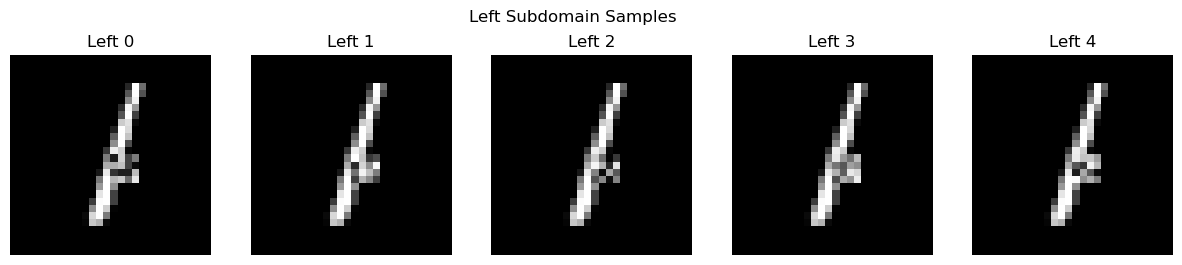

IndexError: index 1 is out of bounds for dimension 1 with size 1

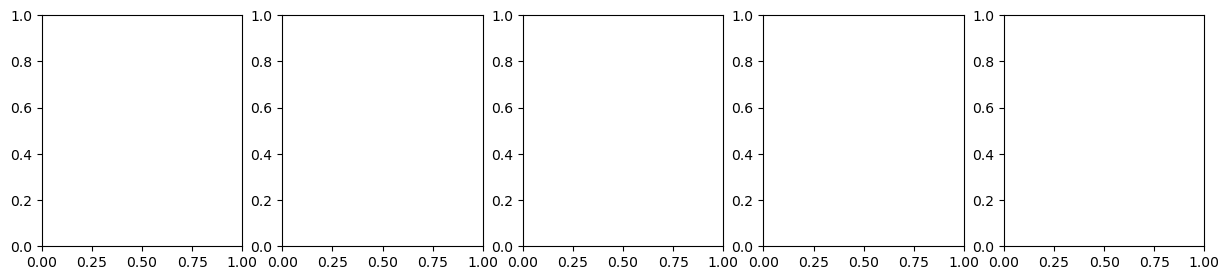

In [4]:
import matplotlib.pyplot as plt

# samples shape: [num_samples, 2, 1, 28, 28]
# squeeze channel dim
samples = samples.squeeze(2)  # → [10, 2, 28, 28]

# 展示前 5 张图
num_show = 5

# === 左边子域样本 ===
fig_left, axes_left = plt.subplots(1, num_show, figsize=(15, 3))
for i in range(num_show):
    axes_left[i].imshow(samples[i, 0].cpu().numpy(), cmap="gray")
    axes_left[i].axis("off")
    axes_left[i].set_title(f"Left {i}")
plt.suptitle("Left Subdomain Samples")
plt.show()

# === 右边子域样本 ===
fig_right, axes_right = plt.subplots(1, num_show, figsize=(15, 3))
for i in range(num_show):
    axes_right[i].imshow(samples[i, 1].cpu().numpy(), cmap="gray")
    axes_right[i].axis("off")
    axes_right[i].set_title(f"Right {i}")
plt.suptitle("Right Subdomain Samples")
plt.show()


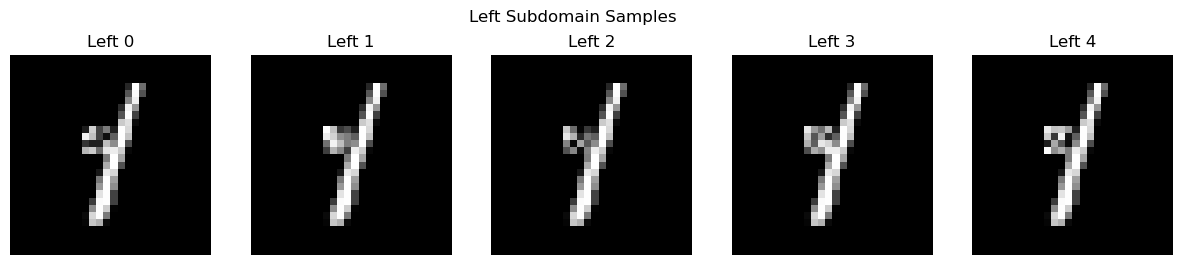

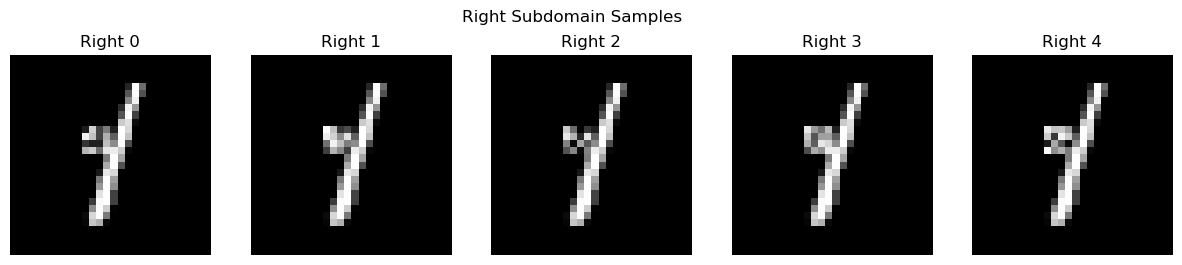

In [24]:
import matplotlib.pyplot as plt

# samples shape: [num_samples, 2, 1, 28, 28]
# squeeze channel dim
samples = samples.squeeze(2)  # → [10, 2, 28, 28]

# 展示前 5 张图
num_show = 5

# === 左边子域样本 ===
fig_left, axes_left = plt.subplots(1, num_show, figsize=(15, 3))
for i in range(num_show):
    axes_left[i].imshow(samples[i, 0].cpu().numpy(), cmap="gray")
    axes_left[i].axis("off")
    axes_left[i].set_title(f"Left {i}")
plt.suptitle("Left Subdomain Samples")
plt.show()

# === 右边子域样本 ===
fig_right, axes_right = plt.subplots(1, num_show, figsize=(15, 3))
for i in range(num_show):
    axes_right[i].imshow(samples[i, 1].cpu().numpy(), cmap="gray")
    axes_right[i].axis("off")
    axes_right[i].set_title(f"Right {i}")
plt.suptitle("Right Subdomain Samples")
plt.show()


In [35]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# 用 numpy.load() 读取 .npy 文件
x_original = np.load("./src/datasets/eran/mnist_eran/X_eran.npy")

# 如果 shape 不是 (batch, 28, 28)，需要 reshape
if x_original.ndim == 2:
    x_original = x_original.reshape(-1, 28, 28)

# 转换为 PyTorch Tensor
x_original = torch.tensor(x_original, dtype=torch.float32)



# 计算扰动部分
perturbation = (x_original[85] - samples[85]).abs()

# 可视化扰动区域
plt.imshow(perturbation.squeeze(0).cpu().numpy(), cmap="hot")  # 去掉通道维度
plt.colorbar()
plt.title("Perturbation Heatmap")
plt.show()


IndexError: index 85 is out of bounds for dimension 0 with size 10

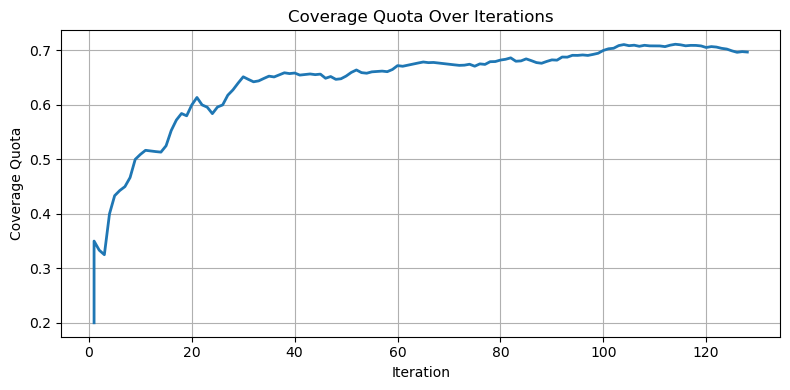

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV，没有列名的话加 header=None
df = pd.read_csv("./save_dir/cov_quota_log.csv")

# 可视化
plt.figure(figsize=(8, 4))
plt.plot(df["iteration"], df["cov_quota"], linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Coverage Quota")
plt.title("Coverage Quota Over Iterations")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import torch

# 加载采样数据
# samples = torch.load("./sample_dir/sample_MNIST_ERAN_patch_size_5_10.pt")
samples = torch.load('./sample_dir/sample_MNIST_ERAN_l_inf.pt')
# 查看 shape
print("Shape of samples:", samples.shape)  # 预期 (sample_num, 1, 28, 28) 或 (sample_num, 28*28)


Shape of samples: torch.Size([10, 1, 28, 28])


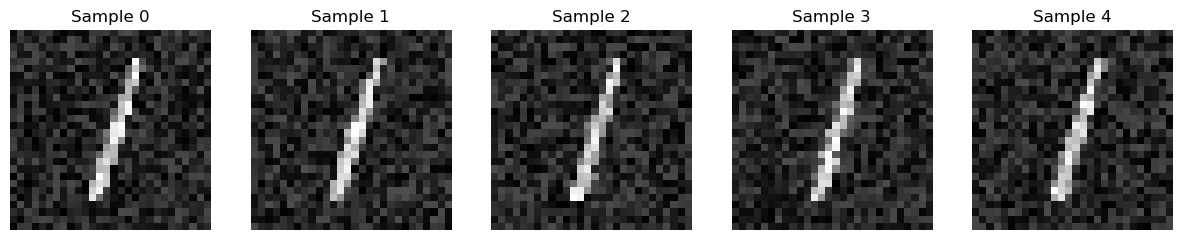

In [3]:
import matplotlib.pyplot as plt

# 如果数据是 (1000, 784)，需要 reshape 成 (1000, 28, 28)
if samples.ndimension() == 2 and samples.shape[1] == 28 * 28:
    samples = samples.view(samples.shape[0], 28, 28)
elif samples.ndimension() == 4:  # 如果是 (1000, 1, 28, 28)，去掉通道维度
    samples = samples.squeeze(1)
# 选取索引范围
start_idx =0
end_idx =4 # 这里的索引是 "包含100" 的，因此样本总数是 `100 - 95 + 1 = 6`

# 创建 `end_idx - start_idx + 1` 个子图
num_samples_to_plot = end_idx - start_idx + 1
fig, axes = plt.subplots(1, num_samples_to_plot, figsize=(15, 3))

# 遍历 `95` 到 `100` 之间的索引
for i, sample_idx in enumerate(range(start_idx, end_idx + 1)):
    axes[i].imshow(samples[sample_idx].cpu().numpy(), cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"Sample {sample_idx}")

plt.show()

In [1]:
import pickle

with open('./sample_dir/sample_rules_4_4.pkl', 'rb') as f:
    rules = pickle.load(f)


D:\Environment\anaconda3\envs\IP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
from collections import defaultdict

# 建立树结构：child -> parent
tree = defaultdict(list)
domain_to_parent = {}

max_id = 15
filtered_rules = {k: v for k, v in rules.items() if k <= max_id}

for i in range(2, len(filtered_rules), 2):
    parent_id = rules[i - 2]['domain_id']
    left_child = rules[i]['domain_id']
    right_child = rules[i+1]['domain_id']
    
    tree[parent_id].extend([left_child, right_child])
    domain_to_parent[left_child] = parent_id
    domain_to_parent[right_child] = parent_id


AttributeError: 'list' object has no attribute 'items'

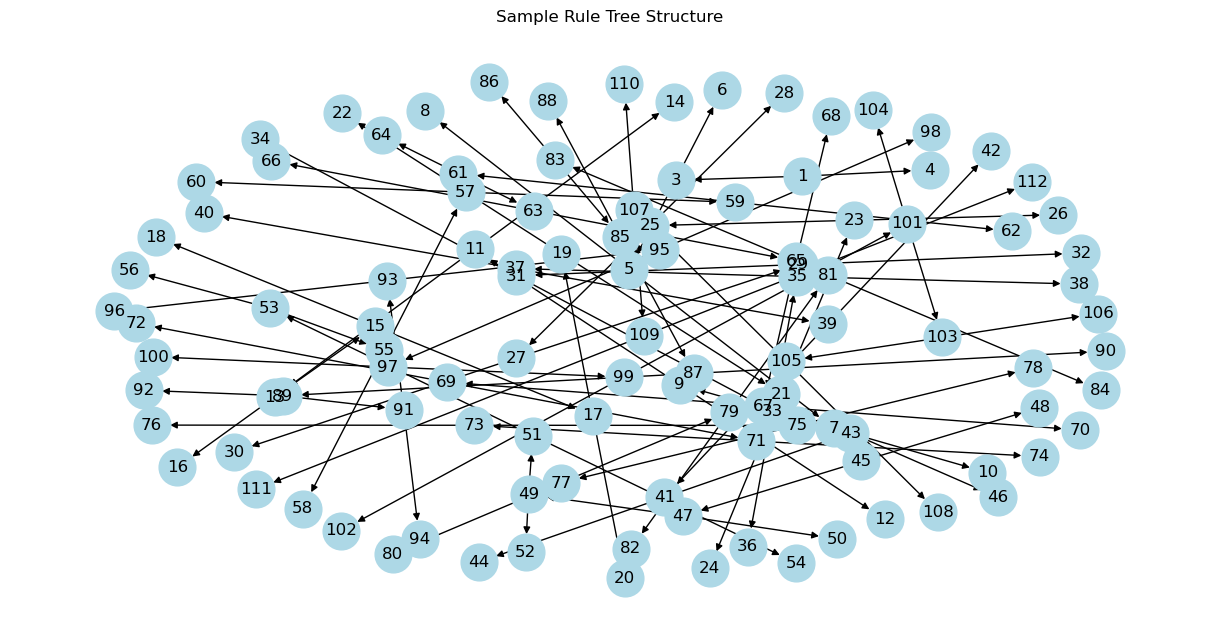

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()


# 从 root 开始构建图
def add_edges(parent):
    for child in tree.get(parent, []):
        G.add_edge(parent, child)
        add_edges(child)

add_edges(1)  # 假设 domain_id=1 是 root

# 画图
plt.figure(figsize=(12, 6))
# pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
pos = nx.spring_layout(G, seed=42)  # 不依赖 Graphviz
nx.draw(G, pos, with_labels=True, arrows=True, node_size=700, node_color='lightblue')
plt.title("Sample Rule Tree Structure")
plt.show()
